####  Project :  Autism Spectrum Disorder Detection 

#### 1)Import required libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,precision_score,recall_score

#### A) Toodlers Model

In [140]:
df1=pd.read_csv('Toodler.csv')

In [141]:
df1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,Sex,Class
0,0,0,0,0,0,0,1,1,0,1,28,f,No
1,1,1,0,0,0,1,1,0,0,0,36,m,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,Yes


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A1_Score   1054 non-null   int64 
 1   A2_Score   1054 non-null   int64 
 2   A3_Score   1054 non-null   int64 
 3   A4_Score   1054 non-null   int64 
 4   A5_Score   1054 non-null   int64 
 5   A6_Score   1054 non-null   int64 
 6   A7_Score   1054 non-null   int64 
 7   A8_Score   1054 non-null   int64 
 8   A9_Score   1054 non-null   int64 
 9   A10_Score  1054 non-null   int64 
 10  Age_Mons   1054 non-null   int64 
 11  Sex        1054 non-null   object
 12  Class      1054 non-null   object
dtypes: int64(11), object(2)
memory usage: 107.2+ KB


In [143]:
df1.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
Age_Mons     0
Sex          0
Class        0
dtype: int64

In [144]:
df1.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f474214bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4742212b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f474214850>],
 'medians': [<matplotlib.lines.Line2D at 0x1f474221970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f474221cd0>],
 'means': []}

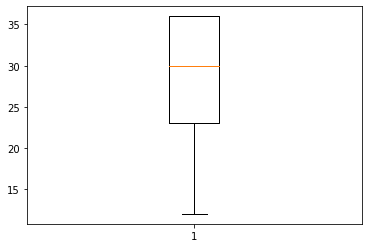

In [145]:
plt.boxplot(df1['Age_Mons'])

In [146]:
T_ASD_Y=len(df1[df1['Class']=='Yes'])
T_ASD_N=len(df1[df1['Class']=='No'])
print("Number of Toodlers with ASD:",T_ASD_Y)
print("Number of Toodlers with ASD:",T_ASD_N)

Number of Toodlers with ASD: 728
Number of Toodlers with ASD: 326


C:\Users\omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Toodler')

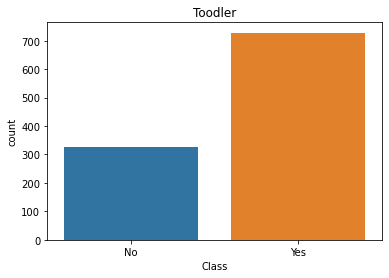

In [147]:
sns.countplot(df1['Class'])
plt.title("Toodler")

In [148]:
T=df1.groupby(['Class','Sex'])

In [149]:
T.get_group(('Yes','m'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,Sex,Class
1,1,1,0,0,0,1,1,0,0,0,36,m,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Yes
5,1,1,0,0,1,1,1,1,1,1,21,m,Yes
6,1,0,0,1,1,1,0,0,1,0,33,m,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1,1,1,1,1,1,1,1,1,1,25,m,Yes
1045,1,1,1,1,1,1,1,1,1,1,30,m,Yes
1050,0,0,1,1,1,0,1,0,1,0,12,m,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,m,Yes


In [150]:
T.get_group(('Yes','f'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,Sex,Class
4,1,1,0,1,1,1,1,1,1,1,20,f,Yes
13,1,1,1,1,0,0,1,0,1,1,15,f,Yes
17,1,1,1,0,1,1,1,1,0,1,12,f,Yes
19,1,1,1,0,1,0,1,1,0,1,12,f,Yes
35,1,1,1,1,1,1,1,1,1,1,15,f,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,1,1,1,1,0,0,1,0,22,f,Yes
1031,1,1,0,0,0,1,1,1,0,1,36,f,Yes
1036,1,1,0,1,0,1,1,1,0,0,14,f,Yes
1046,0,1,0,1,1,1,1,1,1,0,24,f,Yes


In [151]:
T.get_group(('No','m'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,Sex,Class
8,0,0,0,0,0,0,1,0,0,1,36,m,No
14,0,0,0,0,0,0,0,0,0,0,18,m,No
16,0,0,0,0,0,0,0,0,0,0,36,m,No
29,0,0,0,0,0,0,0,0,0,0,32,m,No
45,0,0,0,0,0,0,1,0,0,1,19,m,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0,0,0,0,0,0,0,1,0,0,28,m,No
1037,0,0,1,0,0,0,0,0,0,0,12,m,No
1040,0,0,0,0,0,0,0,0,0,1,25,m,No
1041,0,0,0,1,0,0,1,0,0,0,25,m,No


In [152]:
T.get_group(('No','f'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,Sex,Class
0,0,0,0,0,0,0,1,1,0,1,28,f,No
12,0,0,0,0,0,0,0,0,0,0,25,f,No
18,1,0,0,0,1,0,0,0,0,1,29,f,No
25,0,0,0,0,0,0,0,0,0,0,24,f,No
30,0,0,0,0,0,0,0,0,0,0,18,f,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0,0,0,1,0,0,1,0,0,1,34,f,No
1020,0,0,0,0,1,0,0,0,1,0,19,f,No
1022,0,0,0,0,0,0,0,0,0,0,36,f,No
1048,0,0,0,0,0,0,0,0,0,0,30,f,No


In [153]:
X=df1.iloc[:,:10]
Y=df1.iloc[:,12:13]

In [238]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0,0,0,0,0,0,1,1,0,1
1,1,1,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1
1050,0,0,1,1,1,0,1,0,1,0
1051,1,0,1,1,1,1,1,1,1,1
1052,1,0,0,0,0,0,0,1,0,1


In [239]:
Y

,Class
0,No
1,Yes
2,Yes
3,Yes
4,Yes
...,...
1049,No
1050,Yes
1051,Yes
1052,No


In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [311]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((737, 10), (317, 10), (737, 1), (317, 1))

####   Applying ML Algorithms

#### 1)Logistic Regression :

In [312]:
lg = LogisticRegression(solver='newton-cg', max_iter=300, penalty='l2',C=0.1, l1_ratio= None, random_state=42)
lg.fit(X_train, Y_train)
pred= lg.predict(X_test)
#a=np.array([1,1,0,1,1,0,1,0,1,1]).reshape(1,-1)
#pred=lg.predict(a)
#print(pred)
LRA=accuracy_score(Y_test, pred)*100
print("Accuracy of Model :",LRA)
Con_Matrix=confusion_matrix(Y_test,pred)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test, pred,average="binary", pos_label="No"))
print("Recall Score",recall_score(Y_test,pred,average="binary", pos_label="No"))
print("F1 Score",f1_score(Y_test,pred,average="binary", pos_label="No"))

Accuracy of Model : 97.79179810725552
Confusion Matrix:
 [[ 90   4]
 [  3 220]]
Precision =  0.967741935483871
Recall Score 0.9574468085106383
F1 Score 0.9625668449197862


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 2)Random Forest :

In [313]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced',ccp_alpha=0.05, random_state=42)
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)
RFAcc=accuracy_score(Y_test, pred)*100
print("Accuracy of Model :",RFAcc)
Con_Matrix=confusion_matrix(Y_test,pred)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test, pred,average="micro", pos_label="NO"))
print("Recall Score:",recall_score(Y_test,pred,average="micro", pos_label="NO"))
print("F1 Score:",f1_score(Y_test,pred,average="micro", pos_label="NO"))

Accuracy of Model : 87.69716088328076
Confusion Matrix:
 [[ 84  10]
 [ 29 194]]
Precision =  0.8769716088328076
Recall Score: 0.8769716088328076
F1 Score: 0.8769716088328076


<ipython-input-313-3e37f0e7b76e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when ave

#### 3)Decision Tree :

In [314]:
dt=DecisionTreeClassifier(min_samples_leaf= 30, random_state=42)
dt.fit(X_train,Y_train)
pred= dt.predict(X_test)
DTAcc=accuracy_score(Y_test, pred)*100
print("Accuracy of Model :",DTAcc)
Con_Matrix=confusion_matrix(Y_test,pred)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test, pred,average="binary", pos_label="No"))
print("Recall Score",recall_score(Y_test,pred,average="binary", pos_label="No"))
print("F1 Score",f1_score(Y_test,pred,average="binary", pos_label="No"))

Accuracy of Model : 88.32807570977917
Confusion Matrix:
 [[ 80  14]
 [ 23 200]]
Precision =  0.7766990291262136
Recall Score 0.851063829787234
F1 Score 0.8121827411167513


#### 4) SVM  :

In [315]:
svc = SVC(kernel='rbf', C=0.45, gamma=0.07,probability=True)
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
SVMAcc=accuracy_score(Y_test, pred)*100
print("Accuracy of Model :",SVMAcc)
Con_Matrix=confusion_matrix(Y_test,pred)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test, pred,average="binary", pos_label="No"))
print("Recall Score",recall_score(Y_test,pred,average="binary", pos_label="No"))
print("F1 Score",f1_score(Y_test,pred,average="binary", pos_label="No"))

Accuracy of Model : 96.84542586750788
Confusion Matrix:
 [[ 87   7]
 [  3 220]]
Precision =  0.9666666666666667
Recall Score 0.925531914893617
F1 Score 0.9456521739130436


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [316]:
data={
    "Algorithms":["Logistic Regression","Random Forest","Decision Tree","SVM"],
    "Accuracy":[LRA,RFAcc,DTAcc,SVMAcc]
}
df=pd.DataFrame(data,index=[1,2,3,4])
df

,Algorithms,Accuracy
1,Logistic Regression,97.791798
2,Random Forest,87.697161
3,Decision Tree,88.328076
4,SVM,96.845426


In [318]:
import pickle
pickle.dump(rf,open('LRmodel_Toodler.pkl','wb'))

#### B) Children Model

In [319]:
df2=pd.read_csv('Child.csv')
df2

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Jordan,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Jordan,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,Jordan,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,Jordan,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,United States,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7,f,United Kingdom,YES
288,1,0,0,0,1,0,1,0,0,1,7,f,Australia,NO
289,1,0,1,1,1,1,1,0,0,1,4,m,Brazil,YES
290,1,1,1,0,1,1,1,1,1,1,4,m,India,YES


In [320]:
df2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Jordan,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Jordan,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,Jordan,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,Jordan,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,United States,YES


In [321]:
df2.isnull().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
contry_of_res    0
Class/ASD        0
dtype: int64

In [322]:
df2.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [323]:
C_ASD_Y=len(df2[df2['Class/ASD']=='YES'])
C_ASD_N=len(df2[df2['Class/ASD']=='NO'])
print("Number of Toodlers with ASD:",C_ASD_Y)
print("Number of Toodlers with ASD:",C_ASD_N)

Number of Toodlers with ASD: 141
Number of Toodlers with ASD: 151


C:\Users\omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Children')

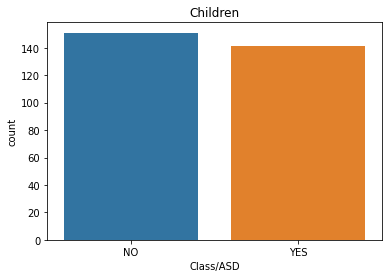

In [324]:
sns.countplot(df2['Class/ASD'])
plt.title("Children")

In [325]:
C=df2.groupby(['Class/ASD','gender'])

In [326]:
C.get_group(('YES','m'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
4,1,1,1,1,1,1,1,1,1,1,5,m,United States,YES
6,1,0,1,1,1,1,0,1,0,1,5,m,United Kingdom,YES
10,1,0,0,0,1,1,1,1,1,1,10,m,United Kingdom,YES
12,0,1,1,1,1,1,1,1,1,1,4,m,United States,YES
14,1,1,1,1,1,1,1,1,1,1,6,m,Europe,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1,1,1,1,1,0,1,1,1,1,8,m,Australia,YES
274,1,1,1,1,1,1,1,0,1,1,8,m,United States,YES
279,1,1,1,1,1,1,1,1,1,0,6,m,India,YES
289,1,0,1,1,1,1,1,0,0,1,4,m,Brazil,YES


In [327]:
C.get_group(('YES','f'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
7,1,1,1,1,1,1,1,1,0,0,5,f,Bahrain,YES
8,1,1,1,1,1,1,1,0,0,0,11,f,Bahrain,YES
43,1,0,1,1,1,1,0,1,1,1,4,f,Jordan,YES
48,1,0,1,1,1,1,0,0,1,1,6,f,New Zealand,YES
57,1,0,1,1,1,1,1,1,1,1,4,f,Georgia,YES
58,1,0,1,1,1,1,1,1,1,0,9,f,Armenia,YES
73,1,0,1,1,1,1,0,1,1,1,5,f,Canada,YES
74,1,0,1,1,1,1,0,0,1,1,8,f,Canada,YES
76,1,1,1,1,0,1,1,1,1,1,11,f,Canada,YES
85,1,1,1,1,1,1,1,0,1,1,11,f,United Kingdom,YES


In [328]:
C.get_group(('NO','m'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Jordan,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Jordan,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,Jordan,NO
5,0,0,1,0,1,1,0,1,0,1,4,m,Egypt,NO
17,0,0,0,0,0,0,1,0,0,0,7,m,United States,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,0,1,1,0,0,0,0,1,0,6,m,India,NO
276,0,0,1,0,1,1,1,1,0,1,11,m,India,NO
280,0,0,1,0,0,0,0,0,0,1,4,m,India,NO
281,0,1,1,1,1,1,0,0,0,1,4,m,Australia,NO


In [329]:
C.get_group(('NO','f'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
3,0,1,0,0,1,1,0,0,0,1,5,f,Jordan,NO
9,0,0,1,1,1,0,1,1,0,0,11,f,Austria,NO
11,0,1,0,0,1,0,0,0,0,1,5,f,Kuwait,NO
13,1,0,0,0,0,0,1,0,0,0,4,f,United Arab Emirates,NO
21,0,0,1,1,0,1,0,1,1,0,9,f,Egypt,NO
23,1,0,1,1,0,1,0,0,1,0,6,f,India,NO
26,1,0,1,0,1,1,0,0,1,1,6,f,Afghanistan,NO
29,0,0,1,0,1,0,1,0,0,0,4,f,Georgia,NO
35,0,1,0,0,0,0,0,0,0,0,7,f,Syria,NO
36,0,1,0,0,1,0,0,1,0,0,4,f,Syria,NO


In [330]:
X_C=df2.iloc[:,:10]
Y_C=df2.iloc[:,13:14]

In [331]:
X_C

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,0,0,1,1,0,1,0,0
1,1,1,0,0,1,1,0,1,0,0
2,1,1,0,0,0,1,1,1,0,0
3,0,1,0,0,1,1,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1
288,1,0,0,0,1,0,1,0,0,1
289,1,0,1,1,1,1,1,0,0,1
290,1,1,1,0,1,1,1,1,1,1


In [332]:
Y_C

,Class/ASD
0,NO
1,NO
2,NO
3,NO
4,YES
...,...
287,YES
288,NO
289,YES
290,YES


In [333]:
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(X_C,Y_C,test_size=0.30)

In [334]:
X_train_C.shape,X_test_C.shape,Y_train_C.shape,Y_test_C.shape

((204, 10), (88, 10), (204, 1), (88, 1))

#### Applying ML Algorithms :

#### 1)Logistic Regression :

In [335]:
lg = LogisticRegression(solver='newton-cg', max_iter=300, penalty='l2',C=0.1, l1_ratio= None, random_state=42)
lg.fit(X_train_C, Y_train_C)
pred_C= lg.predict(X_test_C)
#a=np.array([1,1,0,1,1,0,1,0,1,1]).reshape(1,-1)
#pred=lg.predict(a)
#print(pred)
LRA_C=accuracy_score(Y_test_C, pred_C)*100
print("Accuracy of Model :",LRA_C)
Con_Matrix=confusion_matrix(Y_test_C,pred_C)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_C, pred_C,average="binary", pos_label="NO"))
print("Recall Score",recall_score(Y_test_C,pred_C,average="binary", pos_label="NO"))
print("F1 Score",f1_score(Y_test_C,pred_C,average="binary", pos_label="NO"))

Accuracy of Model : 98.86363636363636
Confusion Matrix:
 [[40  0]
 [ 1 47]]
Precision =  0.975609756097561
Recall Score 1.0
F1 Score 0.9876543209876543


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 2) Random Forest :

In [336]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced',ccp_alpha=0.05, random_state=42)
rf.fit(X_train_C, Y_train_C)
pred_C = rf.predict(X_test_C)
RFAcc_C=accuracy_score(Y_test_C, pred_C)*100
print("Accuracy of Model :",RFAcc_C)
Con_Matrix=confusion_matrix(Y_test_C,pred_C)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_C, pred_C,average="micro", pos_label="NO"))
print("Recall Score:",recall_score(Y_test_C,pred_C,average="micro", pos_label="NO"))
print("F1 Score:",f1_score(Y_test_C,pred_C,average="micro", pos_label="NO"))

Accuracy of Model : 84.0909090909091
Confusion Matrix:
 [[34  6]
 [ 8 40]]
Precision =  0.8409090909090909
Recall Score: 0.8409090909090909
F1 Score: 0.8409090909090909


<ipython-input-336-7a0cee0a36ba>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_C, Y_train_C)
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when

#### 3)Decision Tree :

In [337]:
dt=DecisionTreeClassifier(min_samples_leaf= 30, random_state=42)
dt.fit(X_train_C,Y_train_C)
pred_C= dt.predict(X_test_C)
DTAcc_C=accuracy_score(Y_test_C, pred_C)*100
print("Accuracy of Model :",DTAcc_C)
Con_Matrix=confusion_matrix(Y_test_C,pred_C)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_C, pred_C,average="binary", pos_label="NO"))
print("Recall Score",recall_score(Y_test_C,pred_C,average="binary", pos_label="NO"))
print("F1 Score",f1_score(Y_test_C,pred_C,average="binary", pos_label="NO"))

Accuracy of Model : 65.9090909090909
Confusion Matrix:
 [[32  8]
 [22 26]]
Precision =  0.5925925925925926
Recall Score 0.8
F1 Score 0.6808510638297872


#### 4)SVM :

In [338]:
svc = SVC(kernel='rbf', C=0.45, gamma=0.07,probability=True)
svc.fit(X_train_C, Y_train_C)
pred_C = svc.predict(X_test_C)
SVMAcc_C=accuracy_score(Y_test_C, pred_C)*100
print("Accuracy of Model :",SVMAcc_C)
Con_Matrix=confusion_matrix(Y_test_C,pred_C)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_C, pred_C,average="binary", pos_label="NO"))
print("Recall Score",recall_score(Y_test_C,pred_C,average="binary", pos_label="NO"))
print("F1 Score",f1_score(Y_test_C,pred_C,average="binary", pos_label="NO"))

Accuracy of Model : 98.86363636363636
Confusion Matrix:
 [[39  1]
 [ 0 48]]
Precision =  1.0
Recall Score 0.975
F1 Score 0.9873417721518987


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [339]:
data1={
    "Algorithms":["Logistic Regression","Random Forest","Decision Tree","SVM"],
    "Accuracy":[LRA_C,RFAcc_C,DTAcc_C,SVMAcc_C]
}
df1=pd.DataFrame(data1,index=[1,2,3,4])
df1

,Algorithms,Accuracy
1,Logistic Regression,98.863636
2,Random Forest,84.090909
3,Decision Tree,65.909091
4,SVM,98.863636


In [340]:
import pickle
pickle.dump(svc,open('SVMModel_Children.pkl','wb'))

#### C)Adult Model

In [342]:
df3=pd.read_csv('Adult.csv')

In [343]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A1_Score       704 non-null    int64  
 1   A2_Score       704 non-null    int64  
 2   A3_Score       704 non-null    int64  
 3   A4_Score       704 non-null    int64  
 4   A5_Score       704 non-null    int64  
 5   A6_Score       704 non-null    int64  
 6   A7_Score       704 non-null    int64  
 7   A8_Score       704 non-null    int64  
 8   A9_Score       704 non-null    int64  
 9   A10_Score      704 non-null    int64  
 10  age            702 non-null    float64
 11  gender         704 non-null    object 
 12  contry_of_res  704 non-null    object 
 13  Class/ASD      704 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 77.1+ KB


In [354]:
df3.isnull().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              2
gender           0
contry_of_res    0
Class/ASD        0
dtype: int64

In [357]:
df3_u=df3.dropna()

In [358]:
df3_u.isnull().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
contry_of_res    0
Class/ASD        0
dtype: int64

In [360]:
df3_u.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000


In [361]:
A_ASD_Y=len(df3[df3['Class/ASD']=='YES'])
A_ASD_N=len(df3[df3['Class/ASD']=='NO'])
print("Number of Toodlers with ASD:",A_ASD_Y)
print("Number of Toodlers with ASD:",A_ASD_N)

Number of Toodlers with ASD: 189
Number of Toodlers with ASD: 515


C:\Users\omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Adult')

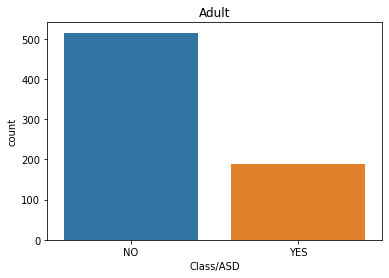

In [362]:
sns.countplot(df3['Class/ASD'])
plt.title("Adult")

In [363]:
A=df3.groupby(['Class/ASD','gender'])

In [364]:
A.get_group(('YES','m'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Spain,YES
5,1,1,1,1,1,0,1,1,1,1,36.0,m,United States,YES
9,1,1,1,1,0,1,1,1,1,0,17.0,m,Bahamas,YES
10,1,1,1,1,1,1,1,1,1,1,33.0,m,United States,YES
53,1,0,1,1,1,1,1,1,0,1,21.0,m,Brazil,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1,1,1,0,1,1,1,1,1,1,28.0,m,United States,YES
688,1,0,1,1,1,1,1,0,1,1,26.0,m,Canada,YES
692,1,1,1,0,1,1,1,1,0,1,28.0,m,United States,YES
694,1,1,1,1,1,0,0,1,0,1,27.0,m,United States,YES


In [365]:
A.get_group(('YES','f'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
31,1,0,0,1,1,1,1,1,0,1,37.0,f,United States,YES
33,1,1,1,1,1,1,1,1,1,1,18.0,f,South Africa,YES
34,1,1,1,1,1,1,1,1,1,1,18.0,f,South Africa,YES
38,1,0,0,1,1,1,1,0,1,1,53.0,f,New Zealand,YES
39,1,0,1,1,0,1,1,1,1,1,35.0,f,United States,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1,0,0,0,1,1,1,1,1,1,39.0,f,Canada,YES
698,1,1,1,1,1,1,1,1,1,1,27.0,f,Australia,YES
699,0,1,0,1,1,0,1,1,1,1,25.0,f,Russia,YES
701,1,0,1,1,1,0,1,1,0,1,24.0,f,Russia,YES


In [366]:
A.get_group(('NO','m'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Brazil,NO
7,1,1,1,1,0,0,0,0,1,0,64.0,m,New Zealand,NO
8,1,1,0,0,1,0,0,1,1,1,29.0,m,United States,NO
13,1,0,0,0,0,0,1,1,0,1,17.0,m,Austria,NO
15,1,1,0,1,1,0,0,1,0,1,18.0,m,New Zealand,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,1,0,0,0,1,0,1,1,0,1,28.0,m,United States,NO
691,1,0,0,1,0,0,1,1,0,0,24.0,m,United States,NO
695,1,0,1,1,0,0,1,1,0,0,28.0,m,Brazil,NO
700,1,0,0,0,0,0,0,1,0,1,34.0,m,Mexico,NO


In [367]:
A.get_group(('NO','f'))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,United States,NO
3,1,1,0,1,0,0,1,1,0,1,35.0,f,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Egypt,NO
6,0,1,0,0,0,0,0,1,0,0,17.0,f,United States,NO
11,0,1,0,1,1,1,1,0,0,1,18.0,f,Burundi,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,1,1,1,1,0,0,0,0,1,0,24.0,f,United States,NO
683,1,1,0,0,0,0,0,1,1,0,30.0,f,United States,NO
690,0,0,0,0,1,0,0,0,0,0,31.0,f,India,NO
693,1,0,0,1,0,0,0,1,0,1,31.0,f,United Kingdom,NO


In [371]:
X_A=df3_u.iloc[:,:10]
Y_A=df3_u.iloc[:,13:14]

In [372]:
X_A

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,1,1,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,0,1
2,1,1,0,1,1,0,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1
4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1
700,1,0,0,0,0,0,0,1,0,1
701,1,0,1,1,1,0,1,1,0,1
702,1,0,0,1,1,0,1,0,1,1


In [373]:
Y_A

,Class/ASD
0,NO
1,NO
2,YES
3,NO
4,NO
...,...
699,YES
700,NO
701,YES
702,NO


In [374]:
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_A,Y_A,test_size=0.30)

In [375]:
X_train_A.shape,X_test_A.shape,Y_train_A.shape,Y_test_A.shape

((491, 10), (211, 10), (491, 1), (211, 1))

#### Applying ML Algorithms

#### 1)Logistic Regression : 

In [376]:
lg = LogisticRegression(solver='newton-cg', max_iter=300, penalty='l2',C=0.1, l1_ratio= None, random_state=42)
lg.fit(X_train_A, Y_train_A)
pred_A= lg.predict(X_test_A)
#a=np.array([1,1,0,1,1,0,1,0,1,1]).reshape(1,-1)
#pred=lg.predict(a)
#print(pred)
LRA=accuracy_score(Y_test_A, pred_A)*100
print("Accuracy of Model :",LRA)
Con_Matrix=confusion_matrix(Y_test_A,pred_A)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_A, pred_A,average="binary", pos_label="NO"))
print("Recall Score",recall_score(Y_test_A,pred_A,average="binary", pos_label="NO"))
print("F1 Score",f1_score(Y_test_A,pred_A,average="binary", pos_label="NO"))

Accuracy of Model : 97.6303317535545
Confusion Matrix:
 [[156   0]
 [  5  50]]
Precision =  0.968944099378882
Recall Score 1.0
F1 Score 0.9842271293375394


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 2)Random Forest :

In [377]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced',ccp_alpha=0.05, random_state=42)
rf.fit(X_train_A, Y_train_A)
pred_A = rf.predict(X_test_A)
RFAcc_A=accuracy_score(Y_test_A, pred_A)*100
print("Accuracy of Model :",RFAcc_A)
Con_Matrix=confusion_matrix(Y_test_A,pred_A)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_A, pred_A,average="micro", pos_label="NO"))
print("Recall Score:",recall_score(Y_test_A,pred_A,average="micro", pos_label="NO"))
print("F1 Score:",f1_score(Y_test_A,pred_A,average="micro", pos_label="NO"))

Accuracy of Model : 91.4691943127962
Confusion Matrix:
 [[144  12]
 [  6  49]]
Precision =  0.9146919431279621
Recall Score: 0.9146919431279621
F1 Score: 0.9146919431279621


<ipython-input-377-1716c7f70a56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_A, Y_train_A)
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'NO') is ignored when

#### 3) Decision Tree :

In [380]:
dt=DecisionTreeClassifier(min_samples_leaf= 30, random_state=42)
dt.fit(X_train_A,Y_train_A)
pred_A= dt.predict(X_test_A)
DTAcc_A=accuracy_score(Y_test_A, pred_A)*100
print("Accuracy of Model :",DTAcc_A)
Con_Matrix=confusion_matrix(Y_test_A,pred_A)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_A, pred_A,average="binary", pos_label="NO"))
print("Recall Score",recall_score(Y_test_A,pred_A,average="binary", pos_label="NO"))
print("F1 Score",f1_score(Y_test_A,pred_A,average="binary", pos_label="NO"))

Accuracy of Model : 90.04739336492891
Confusion Matrix:
 [[147   9]
 [ 12  43]]
Precision =  0.9245283018867925
Recall Score 0.9423076923076923
F1 Score 0.9333333333333333


#### 4) SVM :

In [379]:
svc = SVC(kernel='rbf', C=0.45, gamma=0.07,probability=True)
svc.fit(X_train_A, Y_train_A)
pred_A = svc.predict(X_test_A)
SVMAcc_A=accuracy_score(Y_test_A, pred_A)*100
print("Accuracy of Model :",SVMAcc_A)
Con_Matrix=confusion_matrix(Y_test_A,pred_A)
print("Confusion Matrix:\n",Con_Matrix)
print("Precision = " ,precision_score(Y_test_A, pred_A,average="binary", pos_label="NO"))
print("Recall Score",recall_score(Y_test_A,pred_A,average="binary", pos_label="NO"))
print("F1 Score",f1_score(Y_test_A,pred_A,average="binary", pos_label="NO"))

Accuracy of Model : 98.10426540284361
Confusion Matrix:
 [[156   0]
 [  4  51]]
Precision =  0.975
Recall Score 1.0
F1 Score 0.9873417721518987


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [382]:
data2={
    "Algorithms":["Logistic Regression","Random Forest","Decision Tree","SVM"],
    "Accuracy":[LRA,RFAcc_A,DTAcc_A,SVMAcc_A]
}
df1=pd.DataFrame(data2,index=[1,2,3,4])
df1

,Algorithms,Accuracy
1,Logistic Regression,97.630332
2,Random Forest,91.469194
3,Decision Tree,90.047393
4,SVM,98.104265


In [383]:
import pickle
pickle.dump(svc,open('SVMModel_Adult.pkl','wb'))